# Final Project Linear Notebook

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns            #Seaborn to plot confusion correlation matrix
import imblearn                  #Import imbalanced data module

#Machine Learning Imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn import preprocessing

from sklearn.preprocessing import MaxAbsScaler

### Data

Landslide Dataset from NASA Catalog
The dataset includes date, country, state, latitude, and longitude of the landslide

In [2]:
landslides = pd.read_csv("nasa_global_landslide_catalog_point.csv")
landslides.head()

,OBJECTID,Shape,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,...,event_import_id,latitude,longitude,country_name,country_code,admin_division_name,gazetteer_closest_point,gazetteer_distance,submitted_date,last_edited_date
0,4695181,"(107.45000000000005, 32.56250000000006)",AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,8/1/2008 0:00,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",...,684,32.5625,107.4500,China,CN,Shaanxi,Micang Shan,19.18,4/1/2014 0:00,4/24/2021 4:59
1,4695182,"(-122.66299999999995, 45.42000000000007)",Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,1/2/2009 2:00,2:00,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",...,956,45.4200,-122.6630,United States,US,Oregon,Portland,2.95,4/1/2014 0:00,4/24/2021 4:59
2,4695183,"(-75.35869999999994, -11.12949999999995)",CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,1/19/2007 0:00,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",...,973,-11.1295,-75.3587,Peru,PE,Junín,San Ramon,2.77,4/1/2014 0:00,4/24/2021 4:59
3,4695184,"(81.70800000000008, 28.837800000000072)",Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,7/31/2009 0:00,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,...,1067,28.8378,81.7080,Nepal,NP,Bheri,Katti,11.78,4/1/2014 0:00,4/24/2021 4:59
4,4695185,"(123.89780000000007, 10.333600000000047)",The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00,12:00,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,...,2603,10.3336,123.8978,Philippines,PH,Cebu,Cebu,2.94,4/1/2014 0:00,4/24/2021 4:59


Filter the dataset to get slides that have occured in Washington after 1980 - the farthest back PRISM data goes 

In [3]:
landslides_US = landslides[landslides.country_code == "US"]
landslides_WA = landslides_US[landslides["admin_division_name"].isin(["Washington"])]
landslides_WA = landslides_WA[landslides_US.event_date > "1/1/1981"] 

landslides_WA.head()
#landslides_WA.to_csv(r'/Users/micha/590FinalProject/landslides_WA.csv', index = False) #Export the dataframe to a readable csv

<ipython-input-3-dc3a2a3ac8fe>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  landslides_WA = landslides_US[landslides["admin_division_name"].isin(["Washington"])]
<ipython-input-3-dc3a2a3ac8fe>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  landslides_WA = landslides_WA[landslides_US.event_date > "1/1/1981"]


,OBJECTID,Shape,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,...,event_import_id,latitude,longitude,country_name,country_code,admin_division_name,gazetteer_closest_point,gazetteer_distance,submitted_date,last_edited_date
6,4695187,"(-117.26649999999995, 48.27970000000005)",The Spokesman-Review,http://www.spokesman.com/stories/2012/mar/31/f...,4290,3/30/2012 0:00,NaN,"Pend Oreille County, State Route 20 near Usk, OR","In Pend Oreille County, a mudslide on State Ro...","Pend Oreille County, State Route 20 near Usk, OR",...,4290,48.2797,-117.2665,United States,US,Washington,Usk,3.64,4/1/2014 0:00,4/24/2021 4:59
16,4695197,"(-122.33399999999995, 47.43200000000007)",Ballard News Tribune,https://ballardnewstribune.com/robinson-papers...,961,1/7/2009 0:00,NaN,"Sixth Place South in Normandy Park , Washington",Normandy Park resident Chris DeLaRosa says she...,"Sixth Place South in Normandy Park , Washington",...,961,47.4320,-122.3340,United States,US,Washington,Seattle Tacoma International,2.76,4/1/2014 0:00,4/24/2021 4:59
17,4695198,"(-121.74999999999994, 48.53800000000007)",Corvallis Gazette-Times,http://www.gazettetimes.com/news/local/floodwa...,962,1/7/2009 0:00,NaN,"Concrete, 70 miles northeast of Seattle,Washin...",Rainfall totals for the 24 hours ending at 2 p...,"Concrete, 70 miles northeast of Seattle,Washin...",...,962,48.5380,-121.7500,United States,US,Washington,Concrete,0.25,9/15/2014 17:52,4/24/2021 4:59
18,4695199,"(-122.19999999999999, 48.72000000000003)",Corvallis Gazette-Times,http://www.gazettetimes.com/news/local/floodwa...,963,1/7/2009 0:00,NaN,"Acme area, Whatcom County, Washington","U.S. 97 was closed by slides at Blewett Pass, ...","Acme area, Whatcom County, Washington",...,963,48.7200,-122.2000,United States,US,Washington,Acme,0.11,9/11/2014 21:04,4/24/2021 4:59
19,4695200,"(-122.90899999999999, 46.12990000000008)",TDN,http://tdn.com/news/slide-pushes-kelso-home-of...,964,1/8/2009 0:00,NaN,"Burcham Street, Kelso, Washington",A rain-saturated hillside gave way and knocked...,"Burcham Street, Kelso,Washington",...,964,46.1299,-122.9090,United States,US,Washington,Kelso,1.15,4/1/2014 0:00,4/24/2021 4:59


Due to the laborious task of obtaining precipitation data 
from PRISM, only 138 slides were choses to get precipiation data of 
as well as about a month before and after in that location.
Precipiation data was downloaded from PRISM and a "Slide" column was 
added, equal to 1 for dates of a landslide and 0 for all other dates.

Download the CSVs as dataframes and concatinate them into one dataframe that does not have rows with NaNs 

In [5]:
precipWA1 = pd.read_csv("WASlides/PRISM_ppt_stable_4km_20170101_20170331.csv", header = 10)
precipWA1 = precipWA1.dropna()
precipWA2 = pd.read_csv("WASlides/PRISM_ppt_stable_4km_19961201_19970228.csv", header = 10)
precipWA2 = precipWA2.dropna()
precipWA3 = pd.read_csv("WASlides/PRISM_ppt_stable_4km_19981201_19990131.csv", header = 10)
precipWA3 = precipWA3.dropna()
precipWA4 = pd.read_csv("WASlides/PRISM_ppt_stable_4km_20081201_20090130.csv", header = 10)
precipWA4 = precipWA4.dropna()
precipWA5 = pd.read_csv("WASlides/PRISM_ppt_stable_4km_20101101_20110228.csv", header = 10)
precipWA5 = precipWA5.dropna()
precipWA6 = pd.read_csv("WASlides/PRISM_ppt_stable_4km_20110201_20110331.csv", header = 10)
precipWA6 = precipWA6.dropna()
precipWA7 = pd.read_csv("WASlides/PRISM_ppt_stable_4km_20170301_20170518.csv", header = 10)
precipWA7 = precipWA7.dropna()

precipWA = pd.concat([precipWA1, precipWA2, precipWA3, precipWA4, precipWA5, precipWA6, precipWA7])
precipWA = precipWA.drop(columns = ['Name', 'Date'])            #Do not want these columns to interfere with ML process
precipWA = precipWA.drop([1])                                   #Data set has an uneven number of rows, remove one row

C:\Users\micha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\micha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\micha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\micha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\U

Create a correlation matrix to see if any attributes are correlated and dimension reduction can be used

<AxesSubplot:>

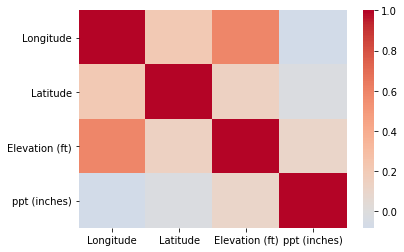

In [6]:
corr_matrix = precipWA.drop('Slide', axis = 1).corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', center = 0)

None of the attributes seem to correlate with each other so the dimensions cannot be reduced

### ML first Run

Featrue Normalization

In [7]:
precipWA_norm = precipWA.drop(columns = ['Slide'])
scaler = preprocessing.StandardScaler().fit(precipWA_norm)
precipWA_norm = scaler.transform(precipWA_norm)
print(precipWA_norm)

[[-0.3386673  -0.22357185 -0.37961822 -0.31331811]
 [-0.3386673  -0.22357185 -0.37961822 -0.60329951]
 [-0.3386673  -0.22357185 -0.37961822 -0.60329951]
 ...
 [-0.65735507 -1.76693325 -0.24994666  0.97841724]
 [-0.65735507 -1.76693325 -0.24994666  0.13483497]
 [-0.65735507 -1.76693325 -0.24994666 -0.60329951]]


Data test, train split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(precipWA_norm, precipWA['Slide'],
                                                    test_size = 0.5, shuffle = True)

Trying different basic classifiers to see which initially performs best and will focus on 

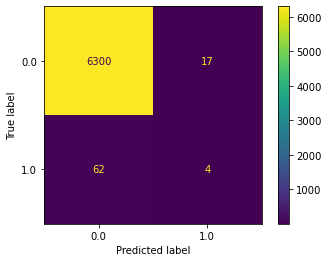

In [9]:
#Random Forest Classifier
RF = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

plot_confusion_matrix(RF, X_test, y_test)

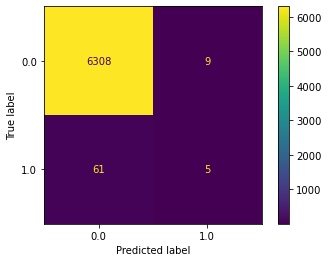

In [10]:
#KNearest Neighbors
KNC = KNeighborsClassifier(n_neighbors = 5)
KNC.fit(X_train, y_train)
y_pred = KNC.predict(X_test)

plot_confusion_matrix(KNC, X_test, y_test)

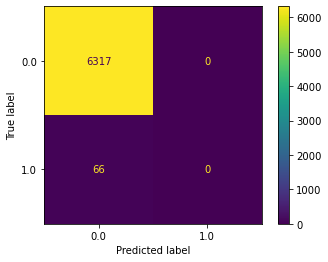

In [11]:
#Support Vector Machine Classifier
SVMC = SVC(gamma = 0.001)
SVMC.fit(X_train, y_train)
y_pred = SVMC.predict(X_test)

plot_confusion_matrix(SVMC, X_test, y_test)

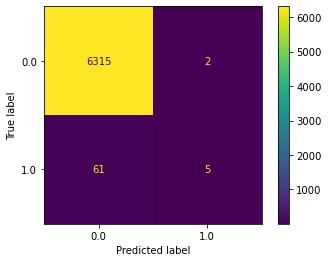

In [12]:
#Multi-Layer Perception
MLP = MLPClassifier(hidden_layer_sizes = 100)
MLP.fit(X_train, y_train)
y_pred - MLP.predict(X_test)

plot_confusion_matrix(MLP, X_test, y_test)

Random Forest and Multi-Layer Perception performed the best of the four, although they did not perform well at predicting slides - 1. This is likely due to the small number of slides relative to non-slides, 138 slides to almost 13,000 non-slides. 

There are a few ways that can be used to try to solve the imbalance issue. The first is to get new/different/better data, but this would take a long time and I don't think is the point of this project. The other options are to do an oversampling and an undersampling. Oversampling will create "fake" data by duplicating the minority attribute - in this case, slides or 1. Undersampling will remove data from the majority attribute - in this case, non-slides or 0. 

I will do both over- and undersampling on Random Forest and Multi-Layer Perception to see what initially works best, and then attempt to fine-tune from there.

### Oversampling

In [13]:
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 0.33) #This will create more slide intances
                                                                                #such that there are a third as many slides
                                                                                #as non-slides
slide = precipWA['Slide']  #Create a dataframe with just slide feature

features_over, slide_over = oversample.fit_resample(precipWA_norm, slide)   #Oversample each the normalized feature dataset 
                                                                            #and the slide dataset
    
X_train, X_test, y_train, y_test = train_test_split(features_over, slide_over, test_size = 0.5, shuffle = True) 
                                                #New test train split with shuffle = True because the oversampling 
                                                #adds the "fake" data at the end of the dataframe. If shuffle
                                                #was False then the test/train would be biased

In [6]:
print(slide_over.count())
print(slide_over.sum())

16795
4167.0


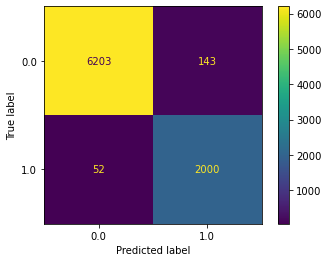

In [14]:
#Random Forst with Oversampling

RF = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

plot_confusion_matrix(RF, X_test, y_test)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


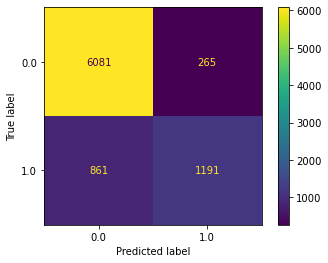

In [15]:
#Multi-Layer Perception with Oversampling

MLP = MLPClassifier(hidden_layer_sizes = 100)
MLP.fit(X_train, y_train)
y_pred - MLP.predict(X_test)

plot_confusion_matrix(MLP, X_test, y_test)

### Undersampling

In [16]:
undersample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy = 0.1) #This will remove non-slides such that 
                                                                                   #there are only 10 times as many
                                                                                   #non-slides as slides
        
features_under, slide_under = undersample.fit_resample(precipWA_norm, slide)       #undersample slides and the normalized
                                                                                   #feature dataset
    
X_train, X_test, y_train, y_test = train_test_split(features_under, slide_under, test_size = 0.5, shuffle = True) 

In [54]:
print(slide_under.count())
print(slide_under.sum())

1518
138.0


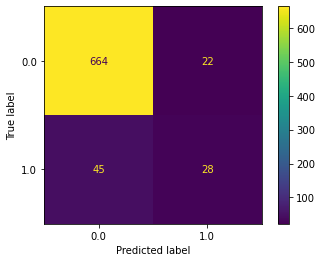

In [17]:
#Random Forest with Undersampling

RF = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

plot_confusion_matrix(RF, X_test, y_test)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


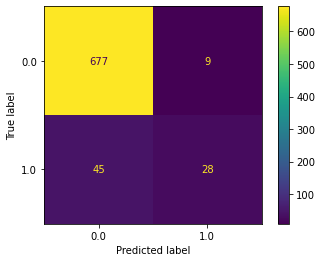

In [18]:
#Multi-Layer Perception with Undersampling

MLP = MLPClassifier(hidden_layer_sizes = 100)
MLP.fit(X_train, y_train)
y_pred - MLP.predict(X_test)

plot_confusion_matrix(MLP, X_test, y_test)

After trying Random Forest and Multi-Layer Perception with both Oversampling and Undersampling, Random Forest with Oversampling performs the best.  

## Random Forest Classifier Parameterization

Want to make sure that the model is predicting "real" landslides and not on the synthetic data

In [19]:
#Split up the real slide data set and keep half of it as validation for a confusion matrix later on

X_test, X_val, y_test1, y_val = train_test_split(precipWA_norm, slide, test_size = 0.5, shuffle = True)

#Still using oversampling with 0.33

features_over, slide_over = oversample.fit_resample(X_test, y_test1)

X_train, X_test, y_train, y_test = train_test_split(features_over, slide_over, test_size = 0.5, shuffle = True)

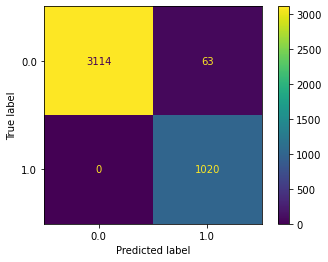

In [20]:
RF = RandomForestClassifier(random_state = 42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

plot_confusion_matrix(RF, X_test, y_test)

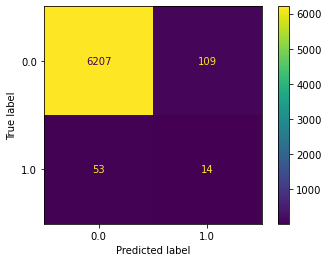

In [21]:
#Validation Data

plot_confusion_matrix(RF, X_val, y_val)

Model likely overfitting due to synthetic data

### Model Parameterization

In [22]:
#Import randomized search CV that will randomly pick parameters and the output is the best scoring model

from sklearn.model_selection import RandomizedSearchCV

In [44]:
RandFor = RandomForestClassifier()
param_grid = {'n_estimators': [10, 30, 50, 100],
             'random_state' : [42],
             'max_depth' : [2, 3, 4, 5]
             }

clf = RandomizedSearchCV(estimator = RandFor, param_distributions = param_grid, scoring = 'f1', n_iter = 8, random_state = 0)
RandFor_model = clf.fit(X_train, y_train)
print(RandFor_model.best_params_)
print("F1 Score: " + str(RandFor_model.best_score_))

{'random_state': 42, 'n_estimators': 30, 'max_depth': 5}
F1 Score: 0.7734384672021758


              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77      3135
         1.0       0.26      0.21      0.23      1062

    accuracy                           0.65      4197
   macro avg       0.50      0.50      0.50      4197
weighted avg       0.62      0.65      0.63      4197

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      6312
         1.0       0.02      0.06      0.03        71

    accuracy                           0.96      6383
   macro avg       0.50      0.51      0.50      6383
weighted avg       0.98      0.96      0.97      6383



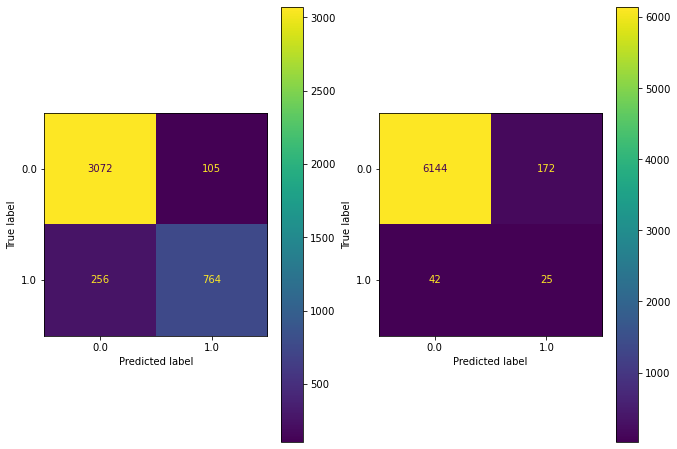

In [41]:
#Implement the best parameters to a Random Forest Classifier Model

RF_best = RandomForestClassifier(n_estimators = 30, max_depth = 5, random_state = 42)
RF_best.fit(X_train, y_train)
y_pred = RF_best.predict(X_test)
y_pred_val = RF_best.predict(X_val)

print(classification_report(y_train, y_pred))
print(classification_report(y_test1, y_pred_val))

fig, axes = plt.subplots(1, 2, figsize = (11,8))
plot_confusion_matrix(RF_best, X_test, y_test, ax = axes[0])
plot_confusion_matrix(RF_best, X_val, y_val, ax = axes[1])

              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79      3135
         1.0       0.28      0.18      0.22      1062

    accuracy                           0.67      4197
   macro avg       0.51      0.51      0.51      4197
weighted avg       0.63      0.67      0.65      4197

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      6312
         1.0       0.02      0.06      0.03        71

    accuracy                           0.96      6383
   macro avg       0.51      0.51      0.51      6383
weighted avg       0.98      0.96      0.97      6383



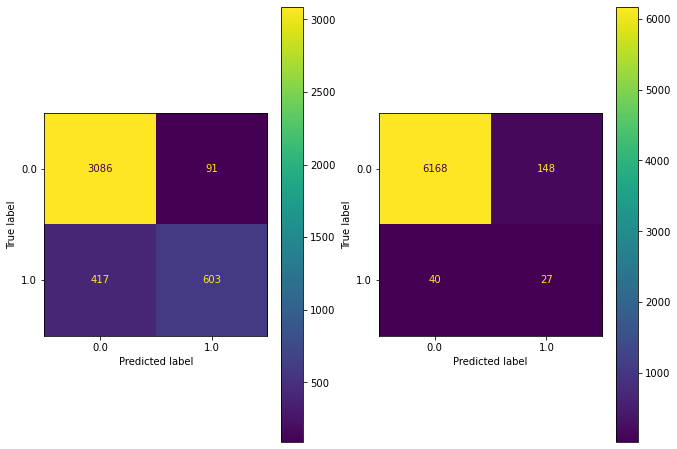

In [39]:
#From manual guess and check of the cross validation, a max_depth of 2 results in the best confusion matrix
#for the validation data set

RF_manual = RandomForestClassifier(n_estimators = 50, max_depth = 4, random_state = 42)
RF_manual.fit(X_train, y_train)
y_pred = RF_manual.predict(X_test)
y_pred_val = RF_manual.predict(X_val)

print(classification_report(y_train, y_pred))
print(classification_report(y_test1, y_pred_val))

fig, axes = plt.subplots(1, 2, figsize = (11,8))
plot_confusion_matrix(RF_manual, X_test, y_test, ax = axes[0])
plot_confusion_matrix(RF_manual, X_val, y_val, ax = axes[1])